In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/Users/chris/GradResearch/SDSS_S82_FP_research/S82analysis/packages/')
import variabilityFunctions as varF



## Sinusoidal time series : value histogram 

Simulate a time series, sample at N equidistant points in time, plot the histogram of x : how likely are we to see a given value ? 

1) x = A sin(t)

In [3]:
#ls ../data_products/

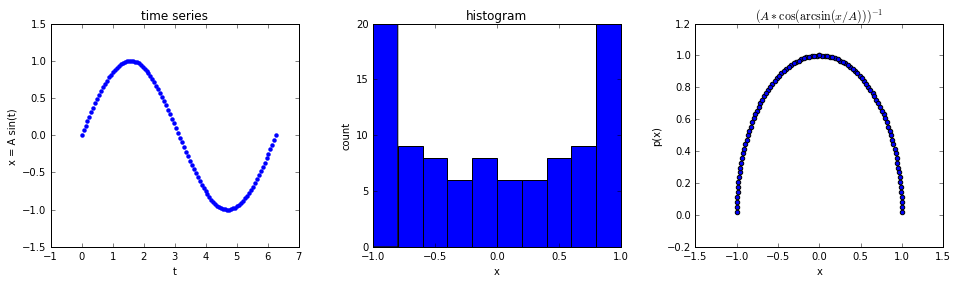

In [2]:
%matplotlib inline

t = np.linspace(0,2*np.pi, num=100)
A = 1 
x = A* np.sin(t)

fig, ax = plt.subplots(1,3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)
ax[0].set_title('time series')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x = A sin(t)')
ax[0].scatter(t,x, lw=0)

ax[1].set_title('histogram')
ax[1].set_xlabel('x')
ax[1].set_ylabel('count')
ax[1].hist(x)

p = 1.0 / A * np.cos(np.arcsin(x/A))
ax[2].scatter(x,p)
ax[2].set_xlabel('x')
ax[2].set_ylabel('p(x)')
ax[2].set_title(r'$(A * \cos(\arcsin(x/A)))^{-1}$')
plt.savefig('../data_products/Fig0_sine_time_series.png')

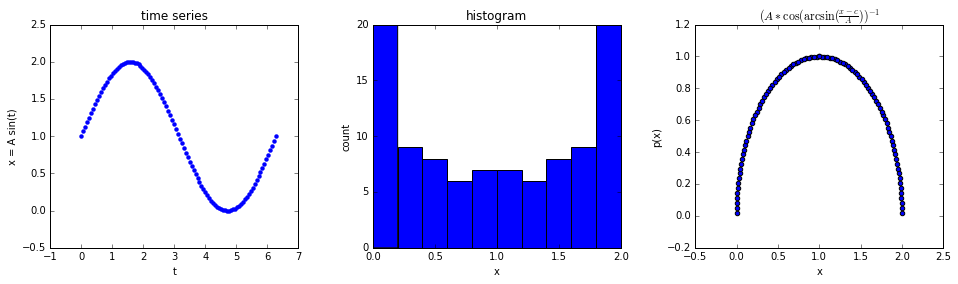

In [5]:
%matplotlib inline

t =  np.linspace(0,2*np.pi, num=100)
A = 1 
c = 1
x = A* np.sin(t) + c

fig, ax = plt.subplots(1,3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)
ax[0].set_title('time series')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x = A sin(t)')
ax[0].scatter(t,x, lw=0)

ax[1].set_title('histogram')
ax[1].set_xlabel('x')
ax[1].set_ylabel('count')
ax[1].hist(x)

p = 1.0 / A * np.cos(np.arcsin((x-c)/A))
ax[2].scatter(x,p)
ax[2].set_xlabel('x')
ax[2].set_ylabel('p(x)')
ax[2].set_title(r'$(A * \cos(\arcsin(\frac{x-c}{A}))^{-1}$')
plt.savefig('../data_products/Fig0_sine_time_series_and_const.png')

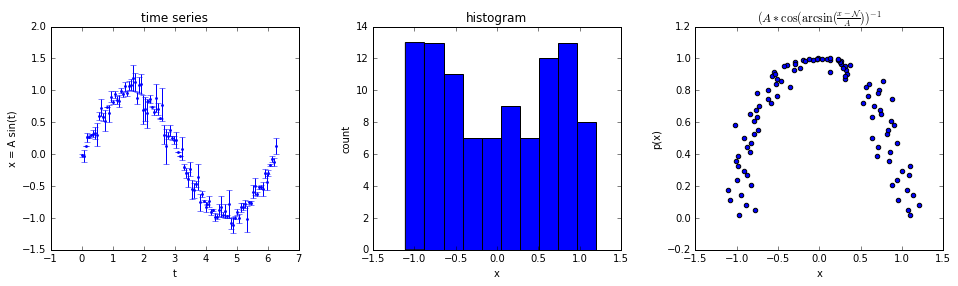

In [6]:
%matplotlib inline

t = np.linspace(0,2*np.pi, num=100)
A = 1 
c = np.random.normal(loc=0.0, scale=0.1, size=len(t))
x = A* np.sin(t) + c

fig, ax = plt.subplots(1,3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)
ax[0].set_title('time series')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x = A sin(t)')
ax[0].scatter(t,x, lw=0, s=8)
ax[0].errorbar(t,x,c, ls='')

ax[1].set_title('histogram')
ax[1].set_xlabel('x')
ax[1].set_ylabel('count')
ax[1].hist(x)

p = 1.0 / A * np.cos(np.arcsin((x-c)/A))
ax[2].scatter(x,p)
ax[2].set_xlabel('x')
ax[2].set_ylabel('p(x)')
ax[2].set_title(r'$(A * \cos(\arcsin(\frac{x-\mathcal{N}}{A}))^{-1}$')
plt.savefig('../data_products/Fig0_sine_time_series_and_noise.png')

## Calculate sigma Fig. 5.8 for sinusoidal time series with mean of 1 and Gaussian noise zero mean and width sigma

Plot Fig. 5.8 for x = A sin(t) + $\mathcal{N}(0,\sigma)+1$

In [3]:
from imp import reload
reload(varF)

<module 'variabilityFunctions' from '/Users/chris/GradResearch/SDSS_S82_FP_research/S82analysis/packages/variabilityFunctions.py'>

In [8]:
from astroML.plotting import setup_text_plots

def plot_astroml_five_eight(plot_data, mu_true=1, sig_true=None, suptitle=None, figtitle=None, plot_mean_stdev=False): 
    # Setup plots specifics
    #setup_text_plots(fontsize=15, usetex=False)
    # Analog of Fig. 5.8
    #--------------------------------------------------
    # Plot data
    fig, ax = plt.subplots(1,3,figsize=(16, 4))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                        bottom=0.15, top=0.88)

    # first plot the histograms for mu
    #ax = fig.add_subplot(121)
    mu, sigma = plot_data['mu'], plot_data['sigma']
    p_mu, p_sigma = plot_data['p_mu'], plot_data['p_sigma']

    # plot the marginalized distribution
    ax[0].plot(mu,p_mu, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(-3, 5, 14)
    ax[0].hist(plot_data['mu_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #mu_true=1
    ax[0].axvline(mu_true, ls=':', color='k')
    #ax[0].axvline(np.mean(, ls=':', color='b')
    
    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$p(\mu)$')
    ticks = ax[0].get_xticks()
    ax[0].set_xticks(ticks[1::2])
    #ax[0].set_xticks(ax.get_xticklabels()[::2], visible=False)
    #ax.set_ylim(0, 1.0)


    # first plot the histograms for sigma
    #ax = fig.add_subplot(122)

    # plot the marginalized distribution
    ax[1].plot(sigma, p_sigma, '-k', label='full')

    # plot the bootstrap distribution
    #bins = np.linspace(0, 5, 31)
    ax[1].hist(plot_data['sigma_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approx')

    if plot_mean_stdev is True :  
        E = np.sum(p_sigma*sigma) / np.sum(p_sigma)
        stdev = np.sqrt(np.sum(sigma*sigma*p_sigma)/ np.sum(p_sigma)  - E*E)
        ax[1].axvline(E, color='green', ls='--')
        ax[1].axvline(E+stdev, color='red', ls='--')
        ax[1].axvline(E-stdev, color='red', ls='--')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    if sig_true is not None: 
        ax[1].axvline(sig_true, ls=':', color='k')

    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel(r'$p(\sigma)$')
    #ax[1].legend(loc=1, prop=dict(size=15))
    ticks = ax[1].get_xticks()
    ax[1].set_xticks(ticks[::2])
    #ax[1].set_xlim(0, 0.4)
    #ax[1].set_ylim(0, 1.0)
    # Analog of Fig. 5.7 
    # Print the Gaussian Distribution with Gaussian Errors  logarithm of the posterior probability density function 
    #------------------------------------------------------------
    # plot the results
    from astroML.plotting.mcmc import convert_to_stdev

    im = ax[2].imshow(plot_data['logL'], origin='lower',
               extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
               cmap=plt.cm.binary,
               aspect='auto',vmin=-5, vmax=0)
    #cbar = plt.colorbar(im , ax=ax[2])
    #

    import matplotlib as mpl
    cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
    cbar = plt.colorbar(im, cax=cax, **kw)
    cbar.set_label(r'$\log(L)$')

    #cbar.set_clim(-5, 0)

    #plt.text(0.5, 0.93,
    #         (r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ '
    #          r'\sigma_{\rm true}=1,\ n=10$'),
    #         bbox=dict(ec='k', fc='w', alpha=0.9),
    #         ha='center', va='center', transform=plt.gca().transAxes)

    ax[2].contour(mu, sigma, convert_to_stdev(plot_data['logL']),
                levels=(0.683, 0.955, 0.997),
                colors='k')

    ax[2].set_xlabel(r'$\mu$')
    ax[2].set_ylabel(r'$\sigma$')
    #ax[2].set_xlim(23.84, 23.96)
    #ax[2].set_ylim(0,0.12)
    ticks = ax[2].get_xticks()
    if len(ticks) > 6 : 
        ax[2].set_xticks(ticks[::2])
        
    #plt.locator_params(axis=ax[2],nbins=4)
    #ticks = ax[2].get_yticks()
    #ax[2].set_yticks(ticks[::2])
    if suptitle is not None:
        fig.suptitle(suptitle, fontsize=15)
    #plt.tight_layout()
    name = '../data_products/'+figtitle
    #plt.tight_layout()
    plt.savefig(name)
    plt.show()
    plt.close(fig)
    

## Reproduce Fig 5.8 

I experiment with the size of sample (from original 10 points to 1000 points), and with the number of bootstrap resamples (varying between original 10000 and 1000). The sample size corresponds to  a size of any given lightcurve, 50-150 points is the expected size. Number of bootstraps is less obvious - in the original figure 5.8 there were only 10 sample points but as many as 10000 resamples.... 

N=10, Nboot=1000


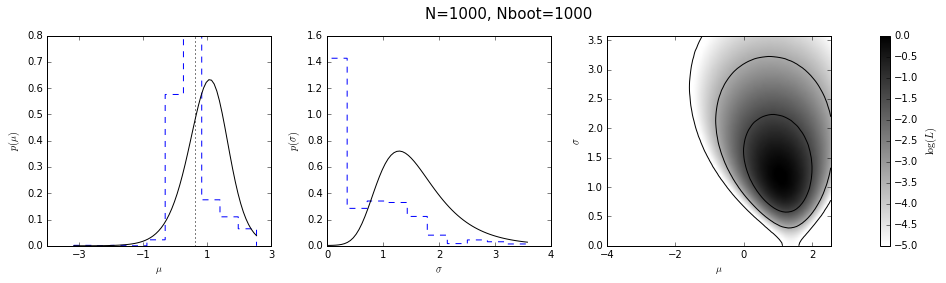

In [9]:
# Investigate N=1000,  Nboot=1000 case 

N=10
Nboot=1000

np.random.seed(5)
ei = 3 * np.random.random(N)
xi = np.random.normal(1 , np.sqrt(1+ei**2.0))
print('N=%d, Nboot=%d'%(N,Nboot))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), suptitle='N=1000, Nboot=1000',figtitle = 'Fig_5.8_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png')

In [10]:
ei

array([ 0.66597951,  2.61219692,  0.62015747,  2.75583272,  1.46523357,
        1.83523159,  2.29772357,  1.55525396,  0.8904015 ,  0.56316369])

N=10, Nboot=1000


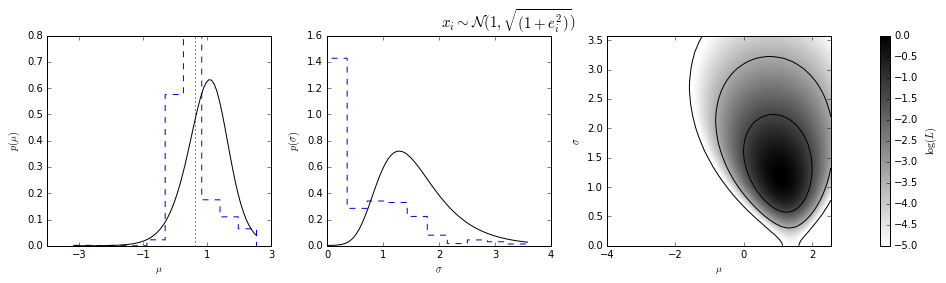

N=10, Nboot=1000


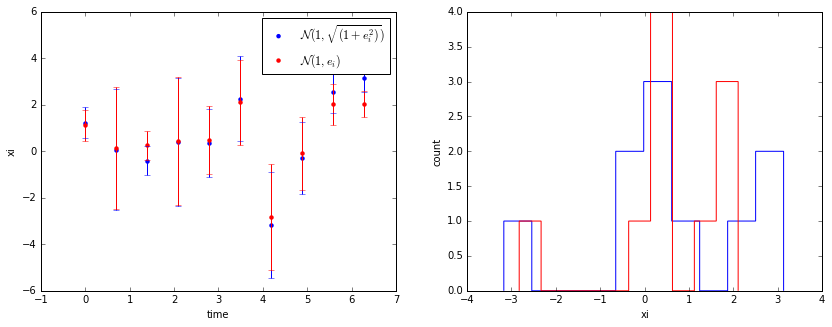

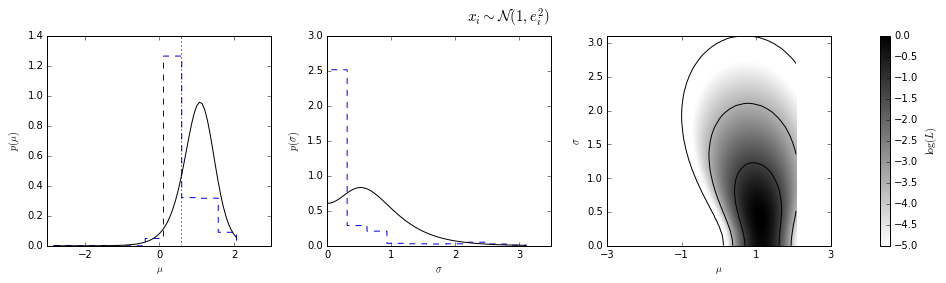

In [11]:
# Simulate random data with some added intrinsic variability sigma == 1 

Nboot=1000

np.random.seed(5)
N=10
t = np.linspace(0,2*np.pi, num=N)

ei = 3 * np.random.random(len(t))
sigma_true= 1
xi = np.random.normal(1 , np.sqrt(sigma_true**2.0 + ei**2.0))
print('N=%d, Nboot=%d'%(N,Nboot))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), 
                        suptitle=r'$x_{i} \sim \mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$',
                        figtitle = 'Fig_5.8_1_N-'+str(N)+'_N_boot-'+str(Nboot)+'_var.png')


fig,ax = plt.subplots(1,2, figsize=(14,5))

ax[0].set_xlabel('time')
ax[0].set_ylabel('xi')

ax[1].set_xlabel('xi')
ax[1].set_ylabel('count')

ax[0].scatter(t,xi,lw=0, label=r'$\mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$')
ax[0].errorbar(t,xi,ei, ls='')


ax[1].hist(xi,histtype='step')

# Simulate random data without any intrinsic variability ... 

np.random.seed(5)
t = np.linspace(0,2*np.pi, num=N)

ei = 3 * np.random.random(len(t))
sigma_true= 1
xi = np.random.normal(1 , np.sqrt(ei**2.0))


ax[0].scatter(t,xi,lw=0, color='red',label=r'$\mathcal{N}(1,e_{i})$')
ax[0].errorbar(t,xi,ei, ls='', color='red')
ax[0].legend(scatterpoints=1)

ax[1].hist(xi,  histtype='step', color='red')

print('N=%d, Nboot=%d'%(N,Nboot))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), suptitle=r'$x_{i} \sim \mathcal{N}(1,e_{i}^{2})$', 
                        figtitle = 'Fig_5.8_1_N-'+str(N)+'_N_boot-'+str(Nboot)+'_novar.png')






In [441]:
a = 5 
str(5).zfill(3)

'005'

N=10, Nboot=1000


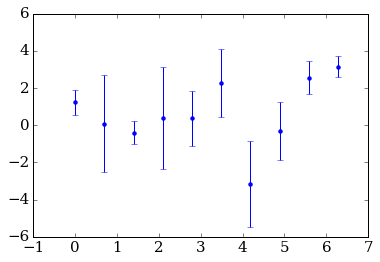

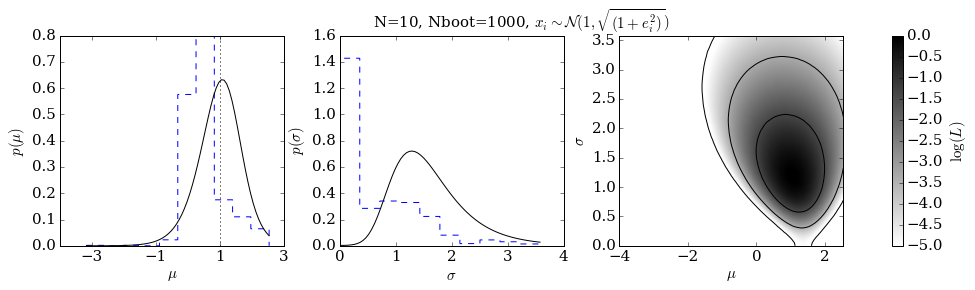

N=10, Nboot=10000


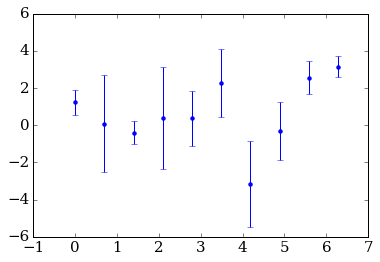

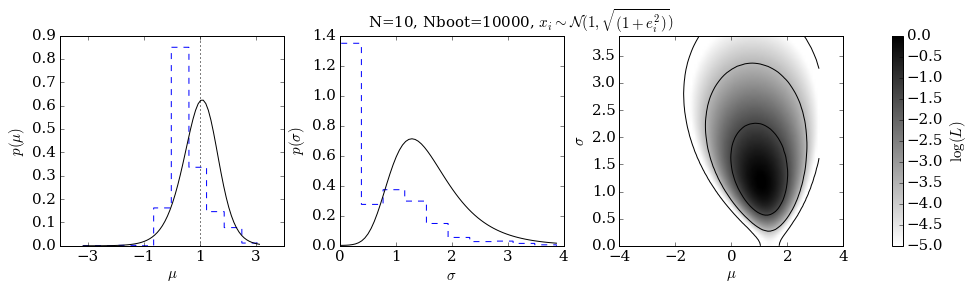

N=100, Nboot=1000


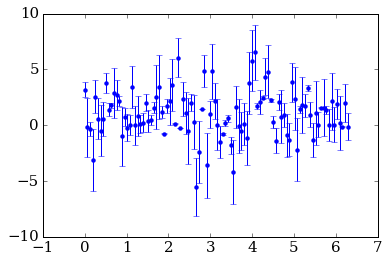

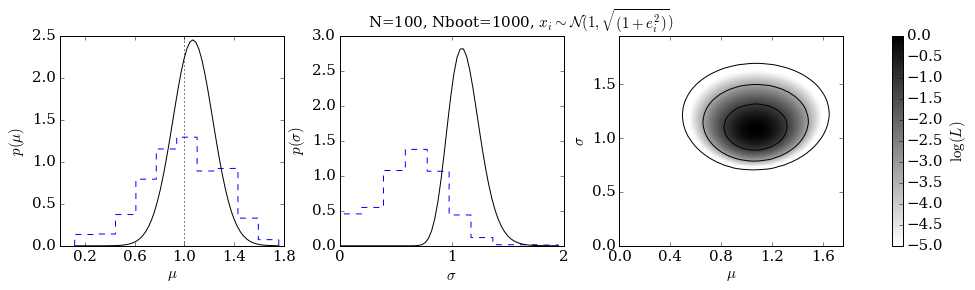

N=100, Nboot=10000


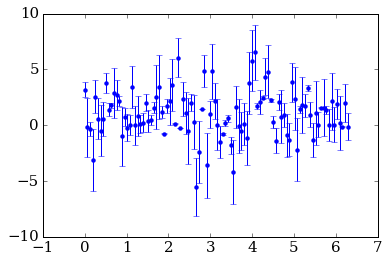

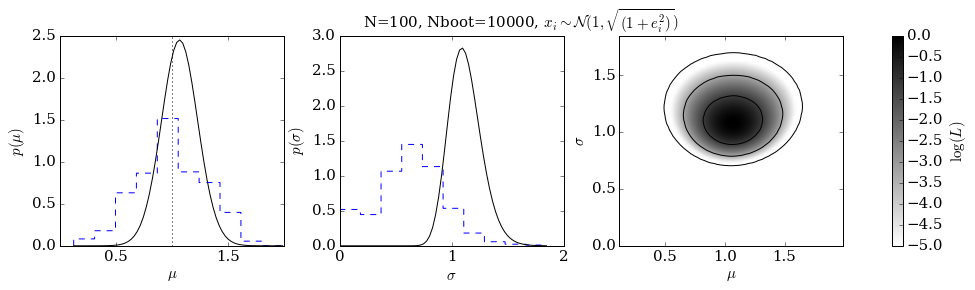

N=1000, Nboot=1000


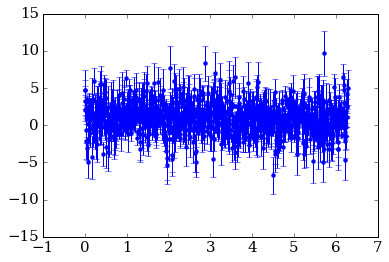

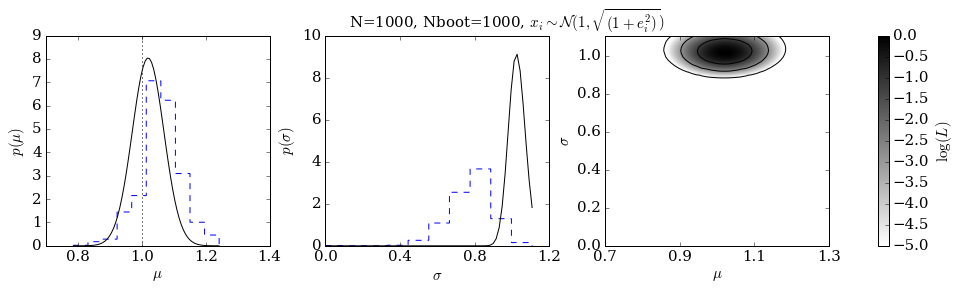

N=1000, Nboot=10000


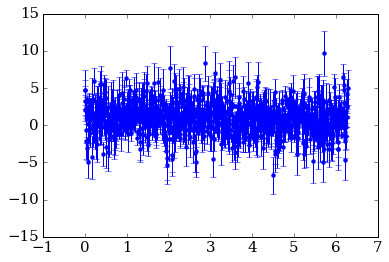

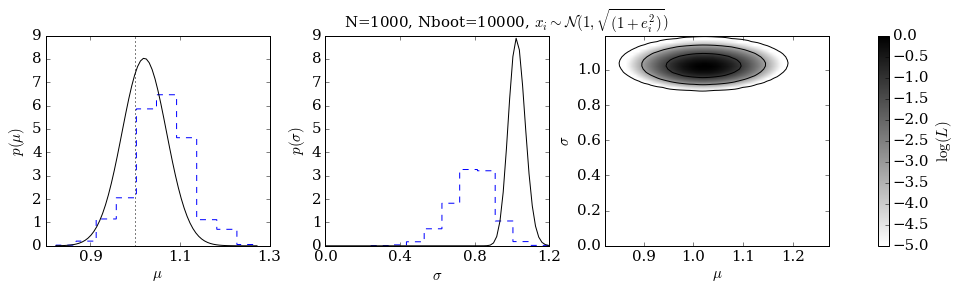

In [451]:
import matplotlib.pyplot as plt 
#np.random.seed(5)
i = 0
for N in [10,100,1000]:
    for Nboot in [1000,10000]:
        
        np.random.seed(5)
        t = np.linspace(0,2*np.pi, num=N)
        ei = 3 * np.random.random(N)
        xi = np.random.normal(1 , np.sqrt(1+ei**2.0))
        
        # make a figure of the time series 
        fig,ax = plt.subplots()
        label = r'$ x_{i} \sim \mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$'
        ax.scatter(t,xi, lw=0, label=label)
        ax.errorbar(t,xi,ei, ls='')
        #ax.set_ylim(0,2)
        plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
    
        print('N=%d, Nboot=%d'%(N,Nboot))
        plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei,  N_boot=Nboot, return_plot_data=True)
        import gc ; gc.collect()
        # set the suptitle for figure and filename 
        sup = 'N='+str(N)+', Nboot='+str(Nboot)+', '+r'$ x_{i} \sim \mathcal{N}(1,\sqrt{(1+e_{i}^{2})})$'
        figt = 'Fig_5.8_random_'+str(i).zfill(2)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'
        plot_astroml_five_eight(plot_data ,  suptitle=sup, figtitle = figt)
        i += 1 

## Fig 5.8 for sinusoidal time series w/ Gaussian noise

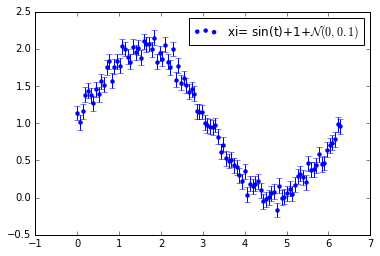

In [8]:
# Plot the time series 
%matplotlib inline

N = 100
t = np.linspace(0,2*np.pi, num=N)
A = 1
sig = 0.1 

ei = np.random.normal(loc=0.0, scale=sig, size=len(t)) 
xi = A* np.sin(t) + 1 + ei
fig,ax = plt.subplots()
label = 'xi= sin(t)+1+'+r'$\mathcal{N}(0,0.1)$'
ax.scatter(t,xi, lw=0, label=label)
ax.legend()
ax.errorbar(t,xi,sig, ls='')
plt.savefig('../data_products/Validate_time_series_illustrate.png')

Amin = 1.897367
mean of xi=0.943981
sigma=2.000000


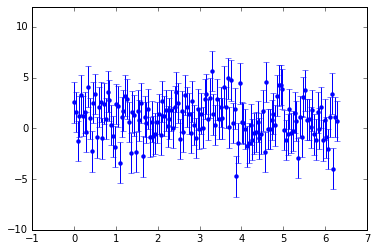

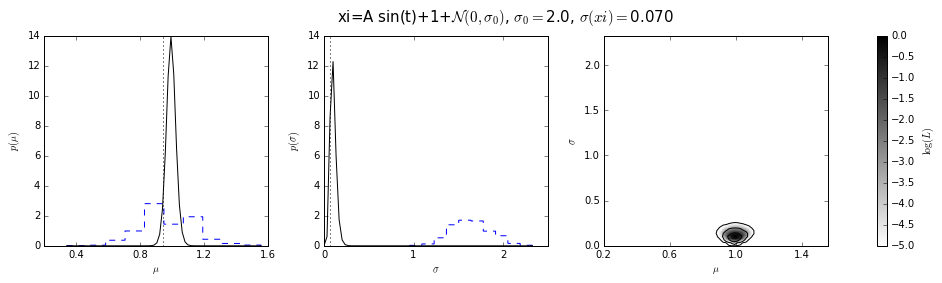

In [13]:
%matplotlib inline

N = 100
Nboot = 1000

t = np.linspace(0,2*np.pi, num=N)
A = 0.1
sigma = [2.0] # [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5, 1]
 # that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 

i = 0
for sig in sigma:
    
    ei = np.random.normal(loc=0.0, scale=sig, size=len(t)) 
    #gaussian = np.random.normal(loc=0.0, scale=ei, size=len(t))
    xi = A* np.sin(t) + 1 + ei
    
    # make a figure of the time series 
    fig,ax = plt.subplots()
    label = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma)$'+ ', '+r'$\sigma=$'+str(sig)
    ax.scatter(t,xi, lw=0, label=label)
    ax.errorbar(t,xi,sig, ls='')
    ax.set_ylim(-10,12)
    plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
    print('Amin = %f'%(3*sig / N**(0.25)))
    print('mean of xi=%f'%np.mean(xi))
    print('sigma=%f'%sig)
    # do it in flux space ... 
    plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)
    import gc ; gc.collect()
    sig_exp = np.sqrt(A*A / 2.0 )
    sup = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma_{0})$'+ ', '+r'$\sigma_{0}=$'+str(sig)+', '+\
           r'$\sigma(xi)=$'+str(sig_exp)[:5]
    figt = 'Fig_5.8_sin_'+str(i).zfill(2)+'_sigma-'+str(sig)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'
    plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), sig_true=A/np.sqrt(2), 
                            suptitle=sup, figtitle = figt)
    i += 1 

mean of xi=0.989325
sigma=0.100000


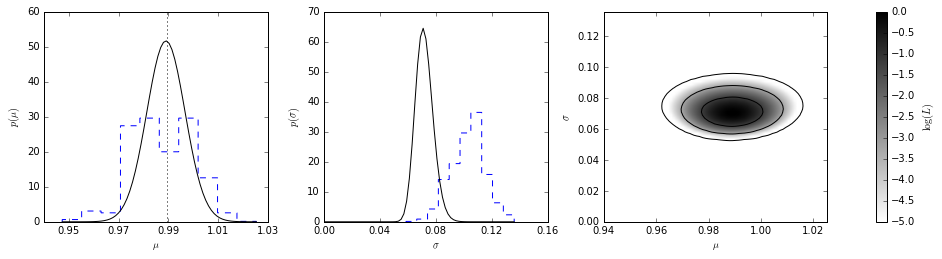

(array([  1.,   0.,   3.,   4.,   6.,  13.,  17.,  17.,  15.,  24.,  14.,
         11.,  10.,   5.,   5.,   1.,   1.,   1.,   1.,   1.]),
 array([ 0.67164198,  0.70715976,  0.74267754,  0.77819531,  0.81371309,
         0.84923087,  0.88474865,  0.92026642,  0.9557842 ,  0.99130198,
         1.02681976,  1.06233753,  1.09785531,  1.13337309,  1.16889087,
         1.20440864,  1.23992642,  1.2754442 ,  1.31096197,  1.34647975,
         1.38199753]),
 <a list of 1 Patch objects>)

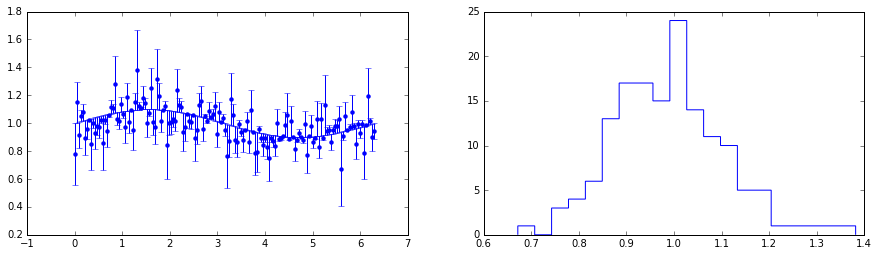

In [14]:

# Plot also histogram of xi values to see how the width of the distribution originates solely from the amplitude 
# of sinusoidal oscillation, but it gets broader as the error increases, i.e. it is harder to see that there 
# is any underlying variability if the error  becomes too large 

%matplotlib inline

N = 100
Nboot = 1000

t = np.linspace(0,2*np.pi, num=150)
A = 0.1
sigma = [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5]
 # that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 
    
sig=0.1
ei = np.random.normal(loc=0.0, scale=sig, size=len(t))
xi = A* np.sin(t) + 1 + ei
print('mean of xi=%f'%np.mean(xi))
print('sigma=%f'%sig)
# do it in flux space ... 
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)
import gc ; gc.collect()
plot_astroml_five_eight(plot_data , mu_true=np.mean(xi),figtitle = 'Fig_5.8_sin_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png')

fig,ax = plt.subplots(1,2, figsize=(15,4))
ax[0].scatter(t,xi,lw=0)
ax[0].errorbar(t,xi,ei,ls='')
ax[1].hist(xi, histtype='step', bins=20)

## Sinusoidal time series with Gaussian Noise: statistical properties 

We generate the time series:  $x(t) = A \sin{(t)} + 1 + \mathcal{N}(0,\sigma_{0})$. 
    
We fix $\sigma_{0} = 0.1$, $N_{points} = 100$, and make use of the AstroML 5.8 code $10^{4}$ times. At each iteration calculate :
* $\chi^{2}_{DOF} = \frac{1}{N}  \sum((x_{i} - 1  ) /  \sigma_{0})^{2}$
* mean : $\langle \sigma_{int} \rangle = \frac{\sum \sigma p(\sigma_{int})}{\sum p(\sigma_{int})}  $ 
* standard deviation : stdev($\sigma_{int}$) = $\left(\frac{\sum \sigma_{int}^{2}p(\sigma_{int}) } {\sum p(\sigma_{int})} - \langle \sigma_{int} \rangle^{2} \right) ^{1/2}$

In [89]:
%matplotlib inline

# parameters to tweak  
N = 100.0
Nboot = 1000
A_values = [0.01, 0.1, 0.7,1.0]#  np.linspace(0.01, 1, 100)  #[0.01, 0.1, 0.7,1]
sigma_0 = 1.0
N_iterations = 3  # 1000

#sigma = [1.0] # [0.001, 0.005, 0.01, 0.02, 0.1, 0.2, 0.3, 0.5, 1]
# that is 0.1%,  0.5%, 1%, 2%, 3%, 5% 

# counter for printing pictures in order 
i = 0

# initialize the time array 
t = np.linspace(0,2*np.pi, num=N)

stats = {}  # array to store values 
for A in A_values : 
    print(' A value is %f' % A)
    stats[A] = {}
    stats[A]['mean'] = np.zeros(N_iterations)
    stats[A]['stdev'] = np.zeros(N_iterations)
    stats[A]['height'] = np.zeros(N_iterations)
    stats[A]['chi2dof'] = np.zeros(N_iterations)

    for k in range(N_iterations):

        # define the time series 
        ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t)) 
        xi = A* np.sin(t) + 1 + ei
        
        # save the time series 
        save_time_series = True
        if save_time_series == True : 
            fname  = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                       '_iteration_'+str(k).rjust(3,'0')+'.txt'
            np.savetxt(fname, np.column_stack((xi,ei)))
        
        # make a figure of the time series
        plot_time_series = False
        if plot_time_series == True  : 
            fig,ax = plt.subplots()
            #label = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma)$'+ ', '+r'$\sigma=$'+str(sigma_0)
            ax.scatter(t,xi, lw=0, label=label)
            ax.errorbar(t,xi,sigma_0, ls='')
            #ax.set_ylim(-10,12)
            #plt.savefig('../data_products/'+'Fig_5.8_series_'+str(i).zfill(2)+'.png')
            #print('Amin = %f'%(3*sigma_0 / N**(0.25)))
            #print('mean of xi=%f'%np.mean(xi))
            #print('sigma=%f'%ssigma_0)

        # Fig 5.8 calculation
        plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi,ei, N_boot=Nboot, return_plot_data=True)

        #  calculate mean, standard deviation, chi2_DOF for p_sigma 
        p_sigma = plot_data['p_sigma'] 
        sigma_int = plot_data['sigma']
        mean = np.sum(p_sigma*sigma_int) / np.sum(p_sigma)
        stdev = np.sqrt(np.sum(sigma_int*sigma_int*p_sigma)/ np.sum(p_sigma)  - mean**2.0 )
        #print('mean=%f, stdev=%f'%(E,stdev))
        data  = xi
        model = 1
        error = sigma_0
        chi_sq_dof = np.sum(((data - model)/ error)**2.0) / N  
        
        # store in a dictionary
        stats[A]['mean'][k]    = mean
        stats[A]['stdev'][k]   = stdev
        stats[A]['chi2dof'][k] = chi_sq_dof

         
        plot_posterior =  False
        if plot_posterior == True : 
            import gc ; gc.collect()
            sig_exp = np.sqrt(A*A / 2.0 )
            sup = 'xi=A sin(t)+1+'+r'$\mathcal{N}(0,\sigma_{0})$'+ ', '+r'$\sigma_{0}=$'+str(sigma_0)+', '+\
                   r'$\sigma(xi)=$'+str(sig_exp)[:5]
            figt = 'Fig_5.8_sin_'+str(i).zfill(2)+'_sigma-'+str(sig)+'_N-'+str(N)+'_N_boot-'+str(Nboot)+'.png'

            # diagnostics : plot to show how the mean and standard deviation of sigma are calculated 
            plot_astroml_five_eight(plot_data , mu_true=np.mean(xi), sig_true=sig_exp, 
                                    suptitle=sup, figtitle = figt, plot_mean_stdev=True)



        i += 1 
print('finished')

 A value is 0.010000
 A value is 0.100000
 A value is 0.700000
 A value is 1.000000
finished


In [90]:
fname

'../data_products/time_series_sig_1.0_A_1.00_iteration_002.txt'

In [24]:
# Save the results of calculation for future plotting...

# BEST way : numpy has a way of remembering the data structure !
# I HAVE NEVER HEARD OF THAT BEFORE - WHY ? 
fname = 'save_A_chi2_stdev_mean.npy'
np.save('../data_products/'+fname, stats) 

# Load the results of calculation ... 
saved = np.load('../data_products/'+fname).item()


Number of iterations is 1000


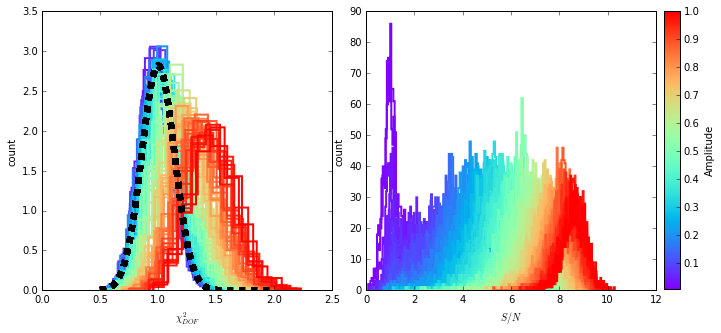

In [59]:
# plot the histogram of chi2dof 
from matplotlib.pyplot import cm 
import matplotlib 

A_test  = A_values[:]

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(vmin=np.min(A_test),vmax=np.max(A_test))

# choose a colormap
c_m = cm.rainbow

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])
print('Number of iterations is %d'%len(stats[A]['mean']))

colors=cm.rainbow(np.linspace(0,1,len(A_test)))
#fig,ax  = plt.subplots(1,2, figsize=(10,5))

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(11,5))
ax = dict()

gs = gridspec.GridSpec(1,10)
ax[0] = plt.subplot(gs[0, :5])  # first  col
ax[1] = plt.subplot(gs[0, 5:])  # first two cols 
#ax[2] = plt.subplot(gs[0, 10])  # span both rows, only second col 
gs.update(wspace=1.1)

for A in A_test: 
    bins = np.linspace(0.5,2,100)
    sigma  = np.sqrt(2/N)
    mu = 1
    import gc ; gc.collect()
    ax[0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
               lw=6, color='black', ls='--', alpha=0.5) # overplotting Gaussian curve 
    ax[0].hist(saved[A]['chi2dof'], histtype='step', label='A='+str(A), color = s_m.to_rgba(A), normed=True, lw=2)  # chi2 
    ax[1].hist(saved[A]['mean'] / saved[A]['stdev'], histtype='step', label='A='+str(A),color = s_m.to_rgba(A), lw=2, bins=100)  # S/N 
    exp_SN = A / (sigma_0*np.sqrt(2/N))
    #ax[1].axvline(exp_SN, ls='--',color = col, lw=2)
    #print('For A=%f, we expect <S/N> = %f'%(A,exp_SN))
    #ax[0].legend(loc='upper right')
    #ax[1].legend(loc='upper right')
    #ax[0].set_title(r'$\chi^{2}_{DOF}$')
    #ax[1].set_title(r'$S/N$')
    ax[0].set_ylabel('count')
    ax[1].set_ylabel('count')
    ax[0].set_xlabel(r'$\chi^{2}_{DOF}$')
    ax[1].set_xlabel(r'$S/N$')
    
#import matplotlib.pyplot as plt
#sm = plt.cm.ScalarMappable(cmap=cm.rainbow(100), norm=plt.Normalize(vmin=min(A_values), vmax=max(A_values)))
# fake up the array of the scalar mappable. Urgh...
#sm._A = []
#plt.colorbar(sm)
x0 = 0.91
y0 = 0.13
dx = 0.02
dy = 0.77
colorbar_ax = fig.add_axes([x0, y0, dx, dy])
cbar = fig.colorbar(s_m, ax=ax[1], cax=colorbar_ax)
cbar.set_label('Amplitude')

plt.savefig('../data_products/chi_sq_dof_SN_histograms.png')

## Completeness curve

Given A, we calculate what fraction is above a certain $S/N$ : choose $S/N=3$ or $5$ to make two completeness curves : plot of completeness vs $A/\sigma$

Completeness is defined as a fraction of all runs that are above a given $S/N$. 

In [65]:
frac = {}
SN_cuts = [3,5]
for SN_cut in SN_cuts :  # choose which completeness curve 
    frac[SN_cut] = np.zeros(len(A_values))
    i = 0 
    for A in A_values :  # for each A, calculate fraction greater than given SN 
        
        SN = stats[A]['mean'] / stats[A]['stdev']
        frac[SN_cut][i] = np.sum(SN > SN_cut) / float(len(SN))
        i += 1 

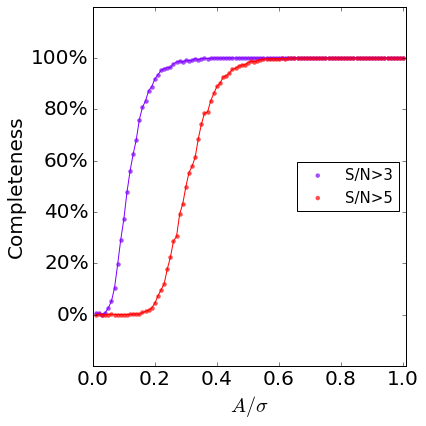

In [127]:
#http://matplotlib.org/users/customizing.html
#import matplotlib
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#font = {'family' : 'sans-serif',
#      'weight' : 'normal',
#        'size'   : 20}
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('font', **font)
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

plt.rc('text', usetex=False)
fig,ax = plt.subplots(figsize = (6,6))
colors=cm.rainbow(np.linspace(0,1,len(SN_cuts)))
for SN_cut, color in zip(SN_cuts,colors) : 
    ax.scatter(A_values, frac[SN_cut], label = 'S/N>'+str(SN_cut), lw=0, color=color, alpha=0.7)
    ax.plot(A_values, frac[SN_cut], color=color)
ax.set_xlabel(r'$A / \sigma$', fontsize=20)
ax.set_ylabel('Completeness', fontsize=20)
ax.set_xlim(0,1.01)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.legend(loc='center right',scatterpoints=1, fontsize=15 )
plt.tight_layout()
plt.savefig('../data_products/Completeness_curve.png')

## Lomb-Scargle Periodogram : Fig. 10.14, 10.15 

In [ ]:
# Read-in the time series realizations from above 

# N = 100.0
# A_values = [0.01, 0.1, 0.7,1.0]
# sigma_0 = 1.0
# N_iterations = 3
# t = np.linspace(0,2*np.pi, num=N)
# for k in range(N_iterations):
   # define the time series 
#     ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t)) 
#     xi = A * np.sin(t) + 1 + ei

# AstroML  lomb_scargle  code  https://github.com/astroML/astroML/blob/master/astroML/time_series/_periodogram.py 


In [134]:
# Load the time series realizations from above 
A_values = [0.01, 0.1, 0.7,1.0]

#for A in A_values:
A = A_values[3]
for k in range(N_iterations):
    fname = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                    '_iteration_'+str(k).rjust(3,'0')+'.txt'
    data = np.genfromtxt(fname)
    xi = data[:,0]
    ei = data[:,1]



In [113]:
omega = np.linspace(0, 5, 1001)[1:]
import scipy.signal as signal

P_obs = signal.lombscargle(xi,ei,omega)

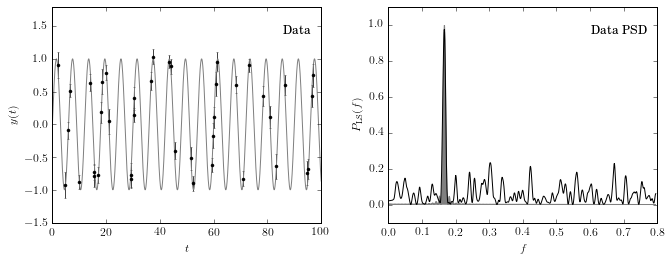

In [128]:
# Calculate 10.14 
from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)


from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

import scipy.signal as signal



#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
P_window = lomb_scargle(t_obs, y_window, 1, omega,
                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig, ax = plt.subplots(1,2,figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')


ax[1].fill(omega, P_true, fc='gray', ec='gray')
ax[1].plot(omega, P_obs1, '-', c='black')
ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

## Test : how the periodogram detects sinusoids generated on-the-fly  

The input frequency is f_true = 1
Using 242.50000000000003 bins
Best period: 0.2946293723183734 days


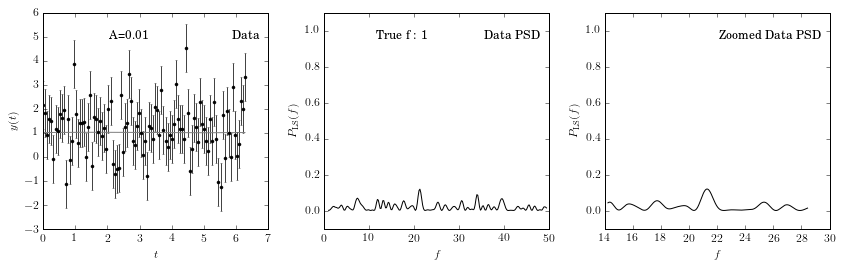

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


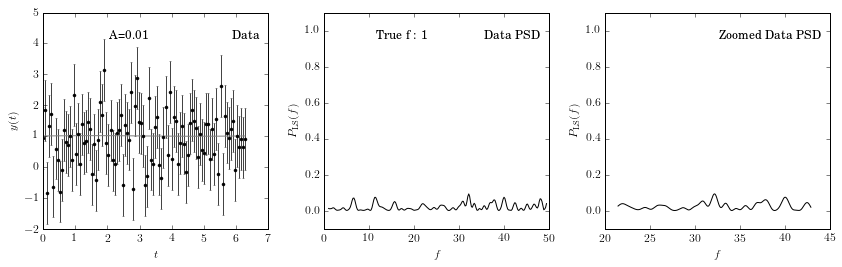

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


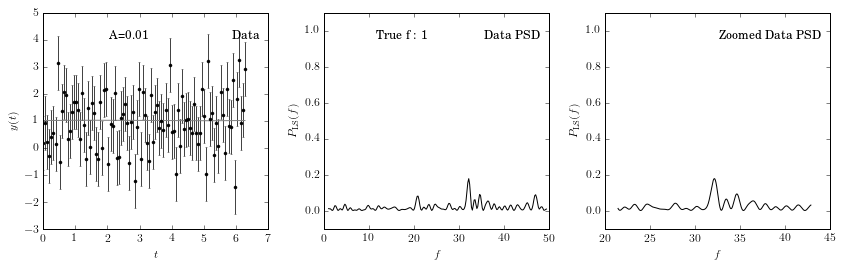

Using 242.50000000000003 bins
Best period: 0.2095844510768554 days


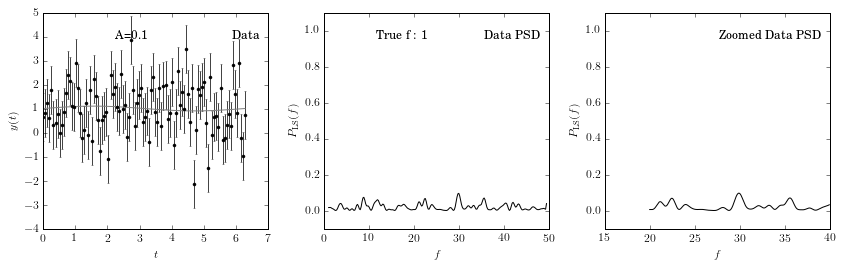

Using 242.50000000000003 bins
Best period: 0.31868834242455646 days


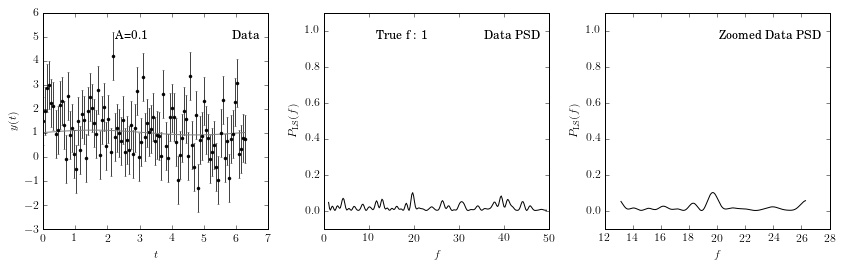

Using 242.50000000000003 bins
Best period: 0.13878174860510312 days


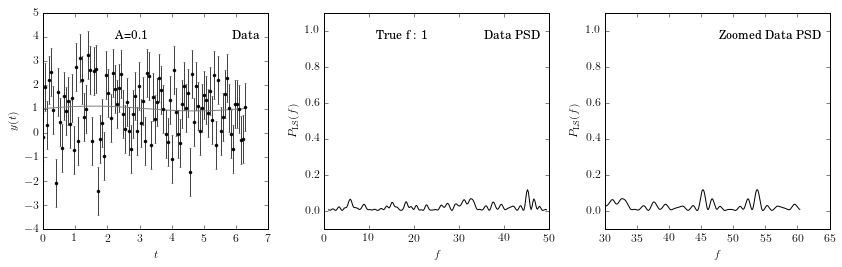

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


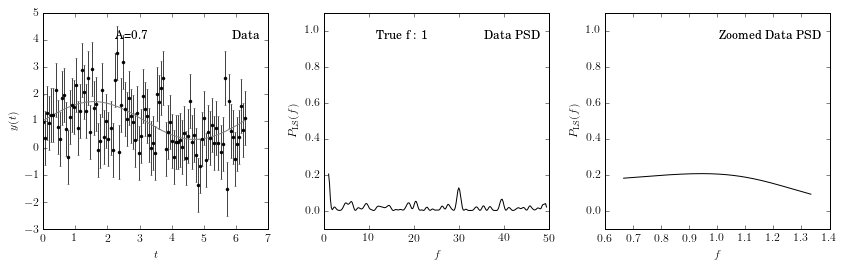

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


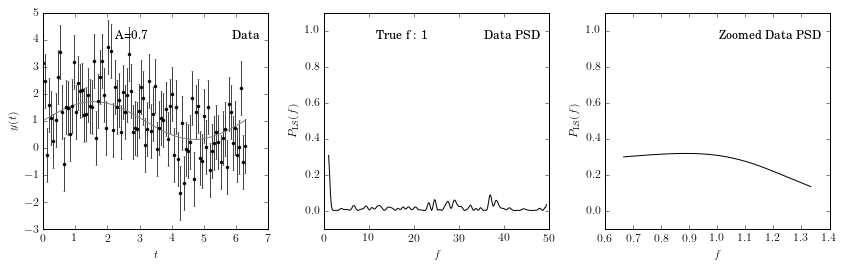

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


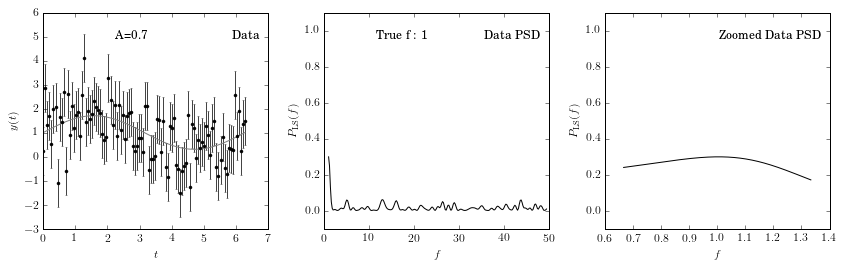

Using 242.50000000000003 bins
Best period: 5.230561861935338 days


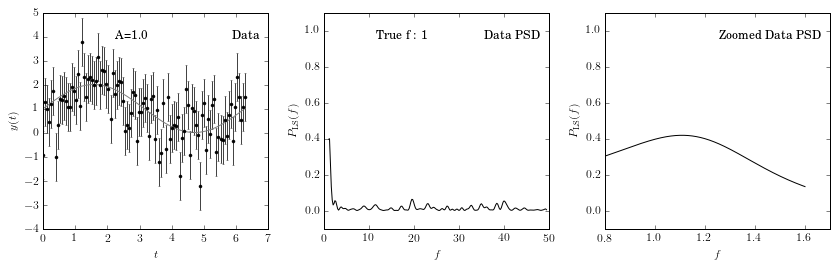

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


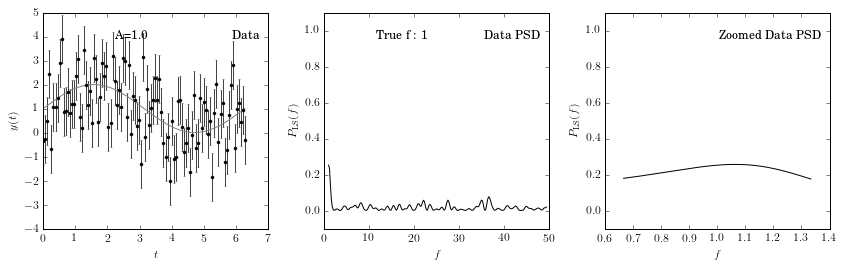

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


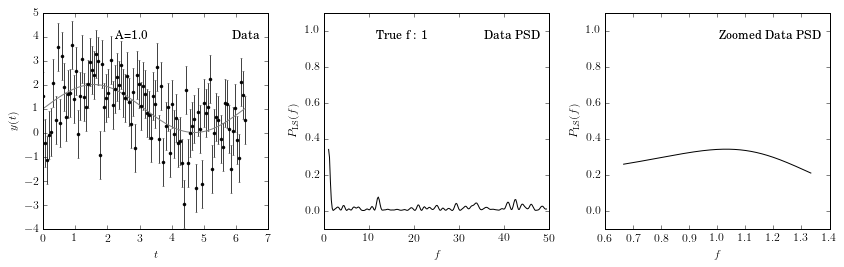

In [206]:
# Calculate 10.14 
from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)
    
N_periods = 1
f_true = 1 
print('The input frequency is f_true = %d'%f_true)
omega_true = f_true * 2 * np.pi 
t_obs = np.linspace(0, N_periods*omega_true, 100)
#sigma_0 = 1.0
i = 0
for A in [0.01, 0.1, 0.7,1.0] : 
    for k in range(N_iterations):
        fname = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                        '_iteration_'+str(k).rjust(3,'0')+'.txt'
        data = np.genfromtxt(fname)
        xi = data[:,0]
        ei = data[:,1]
        #ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs)) 
        #y_obs1 = A* np.sin(t_obs) + 1 + ei
        y_obs1 = xi 
        # true underlying time series 
        t = np.linspace(0,  N_periods*omega_true, 10000)
        y = A* np.sin(t) + 1

        #------------------------------------------------------------
        # Compute the periodogram
        def frequency_grid(times):

            freq_min =  2* np.pi / abs(min(times) - max(times))
            delta_t  = np.zeros(len(times)-1) 
            for i in range(len(times)-1):
                delta_t[i] = (times[i+1]-times[i])
            freq_max = freq_max = np.pi /  np.median(delta_t)  # COMPLETE

            omega_min = 2*np.pi * freq_min

            n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
            print('Using {} bins'.format(n_bins))
            return np.linspace(freq_min, freq_max, n_bins)

        omega = frequency_grid(t_obs)

        P_obs1 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), omega)
        #P_true = lomb_scargle(t, y,  omega)

        def LS_peak_to_period(omegas, P_LS):
            """find the highest peak in the LS periodogram and return the corresponding period."""
            max_freq = omegas[np.argmax(P_LS)]
            return 2*np.pi/max_freq

        # provided alternate frequency function
        def alt_frequency_grid(Pmin, Pmax, n_bins = 5000):
            """Generate an angular frequency grid between Pmin and Pmax (assumed to be in days)"""
            freq_max = 2*np.pi / Pmin
            freq_min = 2*np.pi / Pmax
            return np.linspace(freq_min, freq_max, n_bins)

        best_period = LS_peak_to_period(omega, P_obs1)
        print("Best period: {} days".format(best_period))

        # Zoom in on the peak... , find new omegas and powers 
        zoomed_omega = alt_frequency_grid(Pmin=0.75*best_period, Pmax=1.5*best_period, n_bins = 5000) #
        P_obs2 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), zoomed_omega)

        #------------------------------------------------------------
        # Prepare the figures
        from astroML.plotting import setup_text_plots
        setup_text_plots(fontsize=12, usetex=True)

        fig, ax = plt.subplots(1,3,figsize=(13, 4))
        fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                            left=0.11, right=0.95)

        ax[0].plot(t, y, '-', c='gray')
        ax[0].errorbar(t_obs, y_obs1, sigma_0, fmt='.k', capsize=1, ecolor='#444444')
        ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
        ax[0].text(0.46, 0.92, "A="+str(A), ha='right', va='top', transform=ax[0].transAxes)
        #ax[0].set_ylim(-1.5, 1.8)
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$y(t)$')

        #
        #ax[1].fill(omega, P_true, fc='gray', ec='gray')
        ax[1].plot(omega, P_obs1, '-', c='black')

        ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
        ax[1].text(0.46, 0.92, "True f : "+str(f_true), ha='right', va='top', transform=ax[1].transAxes)
        ax[1].set_ylim(-0.1, 1.1)
        ax[1].set_xlabel('$f$')
        ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

        ax[2].plot(zoomed_omega, P_obs2, '-', c='black')
        ax[2].text(0.96, 0.92, "Zoomed Data PSD", ha='right', va='top', transform=ax[2].transAxes)
        ax[2].set_ylim(-0.1, 1.1)
        ax[2].set_xlabel('$f$')
        ax[2].set_ylabel(r'$P_{\rm LS}(f)$')

        plt.savefig('../data_products/Sine_'+str(i).rjust(2,'0')+'_PSD_sig_1.0_xi_ei_A_'+str(A)+'_iter_'+str(k).rjust(3,'0')+'N_periods_'+str(N_periods)+'.png')
        plt.show()
        i +=1


Using 242.50000000000003 bins


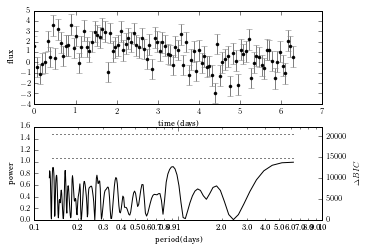

In [158]:
## Figure 10.15 

import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)
N = 100
P =  2*np.pi

t = np.linspace(0,2*np.pi, num=100)
y_obs = xi
dy = ei


#------------------------------------------------------------
# Compute periodogram
def frequency_grid(times):
    
    freq_min =  2* np.pi / abs(min(times) - max(times))
    delta_t  = np.zeros(len(times)-1) 
    for i in range(len(times)-1):
        delta_t[i] = (times[i+1]-times[i])
    freq_max = freq_max = np.pi /  np.median(delta_t)  # COMPLETE
    
    omega_min = 2*np.pi * freq_min
    
    n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
    print('Using {} bins'.format(n_bins))
    return np.linspace(freq_min, freq_max, n_bins)

omega = frequency_grid(t)
period = 2 * np.pi / omega
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs,sigma_0, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
#             arrowprops=dict(arrowstyle='->'))

#ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

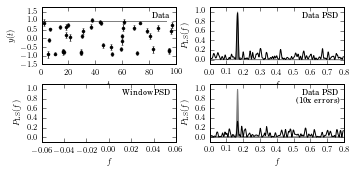

In [327]:

# Fig. 10.14 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)

#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
#P_window = lomb_scargle(t_obs, y_window, 1, omega,
#                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

t = 100 * np.random.random(40) 
y = np.ones_like(t) 
frequency, P_window = LombScargle(t, y).autopower() 


omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax = fig.add_subplot(221)
ax.plot(t, y, '-', c='gray')
ax.errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax.text(0.96, 0.92, "Data", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-1.5, 1.8)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

ax = fig.add_subplot(223)
ax.plot(frequency, P_window, '-', c='black')
ax.text(0.96, 0.92, "Window PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(222)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs1, '-', c='black')
ax.text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(224)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs2, '-', c='black')
ax.text(0.96, 0.92, "Data PSD\n(10x errors)",
        ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

In [239]:
import numpy as np
import astroML
from astroML.time_series import lomb_scargle

t_obs = 100 * np.random.random(40) 
y_window = np.ones_like(t_obs)
#omega = np.linspace(0, 5, 1001)[1:] 

P_window = lomb_scargle(t_obs, y_window, 1, omega, generalized=False, subtract_mean=False)



In [226]:
from astropy.stats import LombScargle

t = 100 * np.random.random(40) 
y = np.ones_like(t_obs) 
omega = np.linspace(0, 5, 1001)[1:] 
frequency, power = P_window = LombScargle(t, y).autopower() # , fit_mean=False, center_data=False)





## Use Jake VdP suggestion to allow LS to set the frequency grid, to avoid missing out the sought after frequency...

--> his paper https://arxiv.org/pdf/1502.01344v1.pdf

--> AstroML Lomb_Scargle code : pointing to Astropy LombScargle https://github.com/astroML/astroML/blob/master/astroML/time_series/periodogram.py

--> Fig 10.15 : P_LS with BIC, AIC http://www.astroml.org/book_figures/chapter10/fig_LS_example.html 

--> Fig 10.14 : the effect of sampling http://www.astroml.org/book_figures/chapter10/fig_sampling.html 

--> Jake's blog post https://jakevdp.github.io/blog/2015/06/13/lomb-scargle-in-python/ 

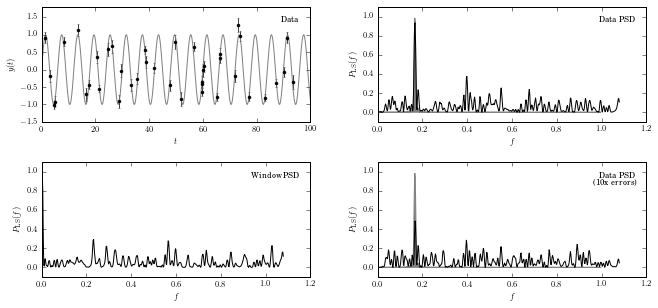

In [332]:
# Fig. 10.14 : comparing the hard-coded frequency grid vs autogrid 
# result : for the autogrid need to set minimum and maximum frequency, because otherwise 
# any period that would fit full number of times will work 
# (that's why here we get f=200 and f=100 if we don't set 
# minimum_frequency=0.01, maximum_frequency=1.0  ,
# while the true  frequency is 0.8 )

from astropy.stats import LombScargle

# sampling of the function + Gaussian noise 
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)


y_window = np.ones_like(y_obs1)

# underlying function 
t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)


#------------------------------------------------------------
# Compute the periodogram

set_frequencies = False  # choose whether we want autofrequencies,  or a hard-coded grid 
                        # NOTE all the dangers of over- or undersampling, as on Jake VdP blog ! 
    
if set_frequencies == True : 
    f_grid = np.linspace(0, 1, 1001)[1:] 
    P_obs1 = LombScargle(t_obs, y_obs1, dy1).power(f_grid)
    P_obs2 = LombScargle(t_obs, y_obs2, dy1).power(f_grid)
    P_window = LombScargle(t_obs, y_window, 1,fit_mean=False, center_data=False ).power(f_grid)
    P_true = LombScargle(t, y, 1).power(f_grid)
    
    f_obs1 = f_grid
    f_window = f_grid
    f_true = f_grid
    f_obs2 = f_grid 

else : 
    f_obs1, P_obs1 = LombScargle(t_obs, y_obs1, dy1).autopower()
    f_obs2, P_obs2 = LombScargle(t_obs, y_obs2, dy2).autopower()
    f_window, P_window = LombScargle(t_obs, y_window, 1,fit_mean=False, center_data=False ).autopower()
    f_true, P_true = LombScargle(t, y).autopower(minimum_frequency=0.01, maximum_frequency=1.0)  # why does it fail here with autopower ? 
    

#------------------------------------------------------------
# Prepare the figures
#fig, axs = plt.subplots(2,2,figsize=(10, 8))
#fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
#                    left=0.11, right=0.95)

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


fig, axs = plt.subplots(2,2,figsize=(10, 5))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)
ax = np.ravel(axs)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')
ax[0].set_ylim(-1.5, 1.8)

ax[1].fill(f_true, P_true, fc='gray', ec='gray')
ax[1].plot(f_obs1, P_obs1, '-', c='black')
ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

ax[2].plot(f_window, P_window, '-', c='black')
ax[2].text(0.96, 0.92, "Window PSD", ha='right', va='top', transform=ax[2].transAxes)
ax[2].set_ylim(-0.1, 1.1)
ax[2].set_xlabel('$f$')
ax[2].set_ylabel(r'$P_{\rm LS}(f)$')
ax[2].set_ylim(-0.1, 1.1)

ax[3].fill(f_true, P_true, fc='gray', ec='gray')
ax[3].plot(f_obs2, P_obs2, '-', c='black')
ax[3].text(0.96, 0.92, "Data PSD\n(10x errors)", ha='right', va='top', transform=ax[3].transAxes)
ax[3].set_ylim(-0.1, 1.1)
ax[3].set_xlabel('$f$')
ax[3].set_ylabel(r'$P_{\rm LS}(f)$')



plt.show()

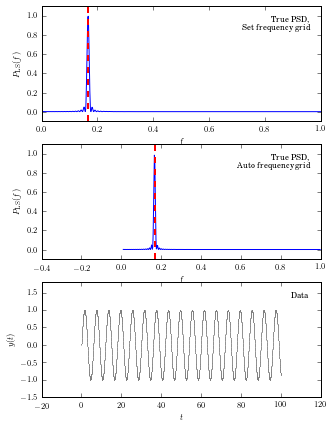

In [318]:
# Calculting autopower on a super-well 
# sampled example, so that there ought be no problems when it 
# comes to frequency detection...
# It shows that autopower needs 
# minimum_frequency=0.01, maximum_frequency=1.0  to be set, 
# or something else that is reasonable, otherwise 
# it will detect trash 

f0 = 1 / 6.0
t = np.linspace(0, 100, 10000)
y = np.sin(2.0 * np.pi *f0 *  t )

# set grid 
f_grid = np.linspace(0, 1, 1001)[1:] 
P_true_grid = LombScargle(t, y, 1).power(f_grid)


# auto grid 
#
# to compute frequencies, .autopower() calls .autofrequency(),  and it passes all arguments there 
# frequency = self.autofrequency(**kwargs) 
# so we can pass arguments such as 
# samples_per_peak=5, nyquist_factor=5, minimum_frequency=None, maximum_frequency=None
#
# http://jakevdp.github.io/astropy/api/astropy.stats.LombScargle.html

f_auto, P_true_auto = LombScargle(t, y,1 ).autopower(minimum_frequency=0.01, maximum_frequency=1.0)   
    
fig, ax= plt.subplots(3,1,figsize=(5,7))

ax[0].plot(f_grid, P_true_grid)
ax[0].text(0.96, 0.92, "True PSD, \nSet frequency grid", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlabel('$f$')
ax[0].set_ylabel(r'$P_{\rm LS}(f)$')
ax[0].axvline(f0, ls='--', c='red', lw=2)

ax[1].plot(f_auto, P_true_auto)
ax[1].text(0.96, 0.92, "True PSD, \nAuto frequency grid", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlim(-0.4,)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')
ax[1].axvline(f0, ls='--', c='red', lw=2)
 
ax[2].scatter(t, y,  c='gray', lw=0, s=1, alpha=0.6)
ax[2].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[2].transAxes)
ax[2].set_ylim(-1.5, 1.8)
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')
ax[2].set_ylim(-1.5, 1.8)

plt.savefig('../data_products/problem-with_autopower.png')
    
    

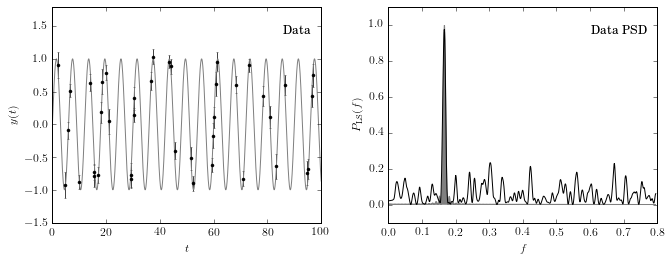

In [334]:
# Calculate 10.14 
# Take only the upper plots (w/o the 
# PSD of window function , or the 10 x error one )
from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)


from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

import scipy.signal as signal



#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
P_window = lomb_scargle(t_obs, y_window, 1, omega,
                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig, ax = plt.subplots(1,2,figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')


ax[1].fill(omega, P_true, fc='gray', ec='gray')
ax[1].plot(omega, P_obs1, '-', c='black')
ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

## 10/24 Sinusoid generated as in 10.14, but homoscedastic errors, freq. grid from E.Bellm, overplot P_LS 10.49 

Eq. 10.49 : 
    
$P_{LS}(\omega) \approx 1 - \frac{\sigma^{2}}{V} - \frac{(\omega - \omega_{0})^{2}}{NV\sigma_{\omega}^{2}}$ where


$\sigma$ is the standard deviation of a Gaussian from which errors are generated, 

$\sigma_{\omega} = \omega_{1/2} [2N(V - \sigma^{2})]^{-1/2}$ is the uncertainty in the location of the peak (its width)

where $\omega_{1/2}$ is the FWHM of the peak, and for fixed length $T$ time series, $\omega_{1/2} \propto T$ (WHY?)

$V = \frac{1}{N} \sum_{j=1}^{N}{y_{j}^{2}}$

Using 154 bins
Gaussian :    amplitude, position, sigma
[ 0.10032543  0.14089544  0.08695147]


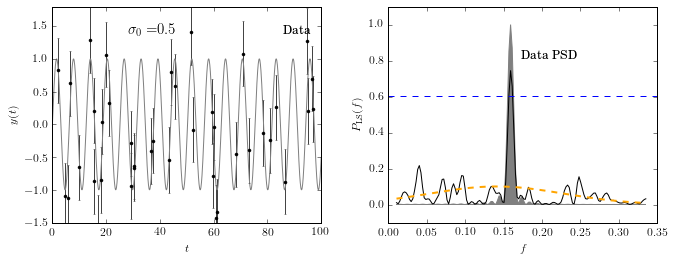

In [30]:
import matplotlib.pyplot as plt 

%matplotlib inline
# Calculate 10.14 
# Take only the upper plots
import numpy as np

from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)

f0 = 1 / (2 * np.pi) 
sigma_0 = 0.5
A = 1 
t_max = 100
homoscedastic = True
N = 40
sigma_guess = 0.5 # for the Gaussian fit, a guess of the extent of Gaussian... 

# Observed time series : with noise ...
# my version : homoscedastic noise ... 

if homoscedastic == True: 
    t_obs = t_max * np.random.random(N)
    ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs))
    y_obs = A*np.sin(2.0 * np.pi *f0 *  t_obs )  + ei 
    dy = np.ones_like(t_obs) * sigma_0
    
    # True underlying time series... 
    t = np.linspace(0, t_max, 1000)
    ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs))
    y = A*np.sin(2.0*np.pi * f0 * t )

# The 10.14 version : heteroscedastic noise... 
if homoscedastic == False : 
    t_obs = t_max * np.random.random(N)  # 40 observations in at **random** (to avoid aliasing frequencies...) 
                                        # times 100 days
    y_obs = A*np.sin(2.0*np.pi * f0 * t_obs )
    dy = 0.1 + 0.1 *np.random.random(y_obs.shape) # this makes heteroscedastic errors.... 
    y_obs += np.random.normal(0, dy)







from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

#------------------------------------------------------------
# Compute the periodogram

# There are various ways of choosing the frequency grid - 
# I wrote a code that calculates that (based on Eric Bellm’s 
# notebook exercises from this summer), instead of using .autopower() 
# method (because I could better understand how it works).  
# This seems a more efficient choice than a fixed grid (which 
# would be too rigid if a priori we don’t know the periodicities involved). 
 
    
# calculate the frequency grid in a manual way : I trust that 
# more than the autopower of scipy LombScargle implementation, 
# and having to manually set minimum_frequency and maximum_frequency...
# because here at least I understand what's going on step by step ...
 
def frequency_grid(times):
        times = np.sort(times)
        freq_min =  2* np.pi / abs(min(times) - max(times))
        delta_t  = np.zeros(len(times)-1) 
        for i in range(len(times)-1):
            delta_t[i] = (times[i+1]-times[i])
        freq_max = np.pi /  np.median(delta_t)  # COMPLETE

        omega_min = 2*np.pi * freq_min

        n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
        n_bins = int(n_bins)
        print('Using {} bins'.format(n_bins))
        return np.linspace(freq_min, freq_max, n_bins)
#3
omega = frequency_grid(t_obs)
#omega = np.linspace(0, 5, 1001)[1:]

P_obs = lomb_scargle(t_obs, y_obs, dy, omega)
#P_window = lomb_scargle(t_obs, y_window, 1, omega,
#                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

frequency = omega / (2 * np.pi)

# 10.47 peak height estimate
V = (1 / len(y_obs)) * np.sum(y_obs*y_obs) 
P_LS_0 = 1.0 - (sigma_0 ** 2.0 ) / V

# In Gaussian approximation,  FWHM = 2 sqrt(2 ln(2)) sigma ~ 2.3548 sigma...
# 10.49 Gaussian peak shape estimate 
#N = len(y_obs)

# this lacks a normalization constant --> instead, fit an actual Gaussian...
#FWHM = 1 / t_max # 2 * np.sqrt(2 * np.log(2)) * sigma_0
#sigma_omega = FWHM * (1 / np.sqrt(2 * N * (V - sigma_0**2.0)))
#
# I use Gaussian approximation by simply fitting a Gaussian to the main peak, and 
# thus I get sigma_omega 
#
# Following http://stackoverflow.com/questions/10880266/robust-algorithm-for-detection-of-peak-widths 

from scipy.optimize import leastsq
from scipy import *

def gaussian(x, A, x0, sig):
    return A*exp(-(x-x0)**2/(2.0*sig**2))

def fit(p,x):
    return np.sum([gaussian(x, p[i*3],p[i*3+1],p[i*3+2]) 
                   for i in range(len(p)//3)],axis=0)

err = lambda p, x, y: fit(p,x)-y

#params are our intitial guesses for fitting gaussians, 
#(Amplitude, x value, sigma):
params = [1, f0, sigma_guess] 
#params = np.asarray(params).flatten()
f0 = frequency[P_true == max(P_true)]

f_range = (frequency > f0 - sigma_guess) * ( frequency < f0 + sigma_guess  )

# fit only to part of P_LS around the peak ... 
results, value = leastsq(err, params, args=(frequency[f_range],P_obs[f_range]))

for res in results.reshape(-1,3):
    print("Gaussian :    amplitude, position, sigma")
    print(res)
    
#P_Gauss = fit(results, x)
#plt.plot(x, P_obs)
#plt.plot(x,y)

#sigma_omega = results[2]

# we assume that somehow we are able to find the true frequency...
#omega_0 = omega[P_true == max(P_true)] # using the P_true since it is giving the theoretical perfectly sampled case 
# (not the observed case ! )

# Quadratic doesn't work very well... Plot a Gaussian instead ! 
#omega_peak = np.linspace(omega_0  - 0.3, omega_0+0.3, 100)
#P_LS_omega = P_LS_0 - (omega_peak - omega_0)**2.0 / (N*V*(sigma_omega**2.0))

P_LS_f0 = fit(results,frequency[f_range])


#------------------------------------------------------------
# Prepare the figures
fig, ax = plt.subplots(1,2,figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs, dy, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].text(0.46, 0.92, r"$\sigma_{0}=$"+r"${0:.1f}$".format(sigma_0), ha='right', va='top', 
           transform=ax[0].transAxes, fontsize=15)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')


ax[1].fill(frequency, P_true, fc='gray', ec='gray')
ax[1].plot(frequency, P_obs, '-', c='black')
ax[1].text(0.7, 0.8, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

# plot the 10.47 estimate...
ax[1].axhline(P_LS_0, ls='--')

# plot the parabolic 10.49 approximation...
# increasing the omega grid in the vicinity of the peak...
ax[1].plot(frequency[f_range],P_LS_f0, c='orange', lw=2, ls='--')

plt.savefig('../data_products/Sinusoid_sig_'+str(sigma_0)+'.png')
plt.show()

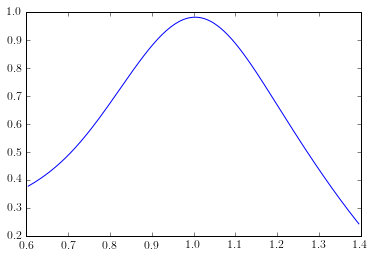

## Test fitting a Gaussian to the peak  P_LS

In [434]:
frequency, P_obs

(array([ 0.00079577,  0.00159155,  0.00238732,  0.0031831 ,  0.00397887,
         0.00477465,  0.00557042,  0.0063662 ,  0.00716197,  0.00795775,
         0.00875352,  0.0095493 ,  0.01034507,  0.01114085,  0.01193662,
         0.0127324 ,  0.01352817,  0.01432394,  0.01511972,  0.01591549,
         0.01671127,  0.01750704,  0.01830282,  0.01909859,  0.01989437,
         0.02069014,  0.02148592,  0.02228169,  0.02307747,  0.02387324,
         0.02466902,  0.02546479,  0.02626057,  0.02705634,  0.02785212,
         0.02864789,  0.02944366,  0.03023944,  0.03103521,  0.03183099,
         0.03262676,  0.03342254,  0.03421831,  0.03501409,  0.03580986,
         0.03660564,  0.03740141,  0.03819719,  0.03899296,  0.03978874,
         0.04058451,  0.04138029,  0.04217606,  0.04297183,  0.04376761,
         0.04456338,  0.04535916,  0.04615493,  0.04695071,  0.04774648,
         0.04854226,  0.04933803,  0.05013381,  0.05092958,  0.05172536,
         0.05252113,  0.05331691,  0.05411268,  0.0

amplitude, position, sigma
[ 0.88772098  0.15247431  0.04794366]


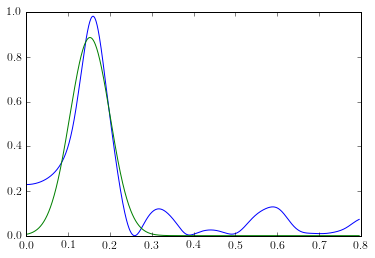

In [444]:
from scipy.optimize import leastsq
from scipy import *

def gaussian(x, A, x0, sig):
    return A*exp(-(x-x0)**2/(2.0*sig**2))

def fit(p,x):
    return np.sum([gaussian(x, p[i*3],p[i*3+1],p[i*3+2]) 
                   for i in range(len(p)//3)],axis=0)

err = lambda p, x, y: fit(p,x)-y

#params are our intitial guesses for fitting gaussians, 
#(Amplitude, x value, sigma):
params = [1,0.15,0.1] # this last one is our noise estimate
#params = np.asarray(params).flatten()

x  = frequency
results, value = leastsq(err, params, args=(x,P_obs))

for res in results.reshape(-1,3):
    print("amplitude, position, sigma")
    print(res)
    
y = fit(results, x)
plt.plot(x, P_obs)
plt.plot(x,y)

sigma_omega = results[2]

## Sinusoid  read from file, cf. eq. 10.49 - 10.50, generate freq. grid with E.Bellm's function, 

The input frequency is f_true = 1
Using 242.50000000000003 bins
Best period: 0.2946293723183734 days


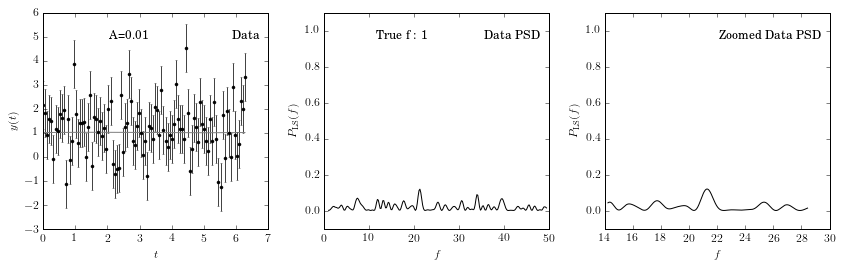

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


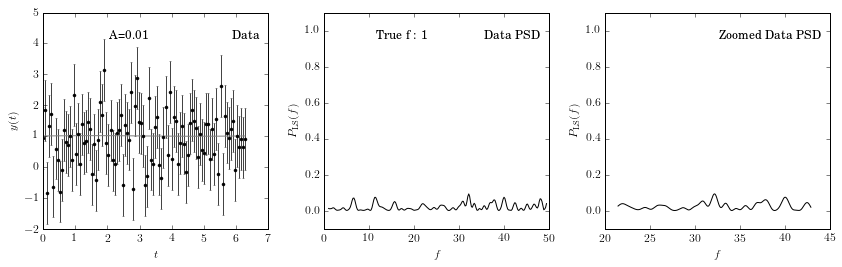

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


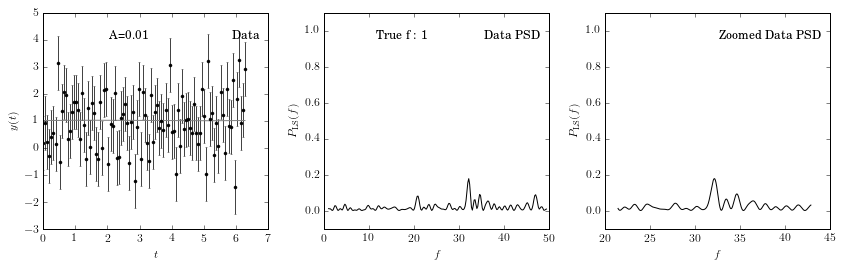

Using 242.50000000000003 bins
Best period: 0.2095844510768554 days


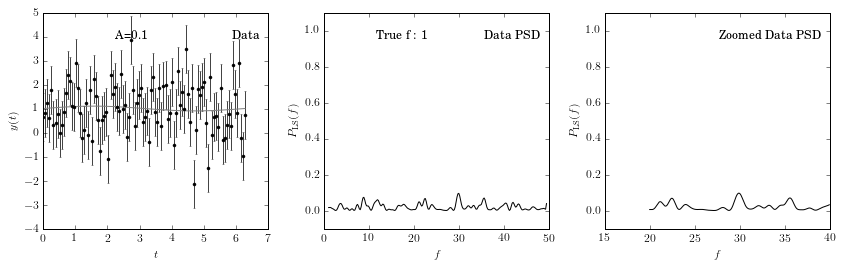

Using 242.50000000000003 bins
Best period: 0.31868834242455646 days


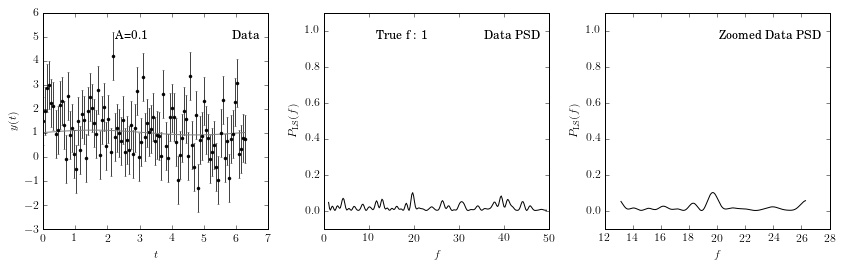

Using 242.50000000000003 bins
Best period: 0.13878174860510312 days


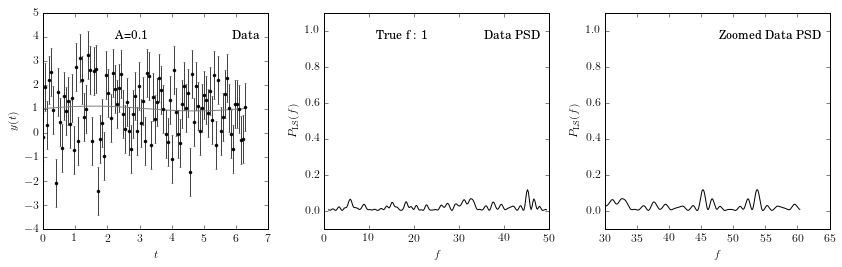

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


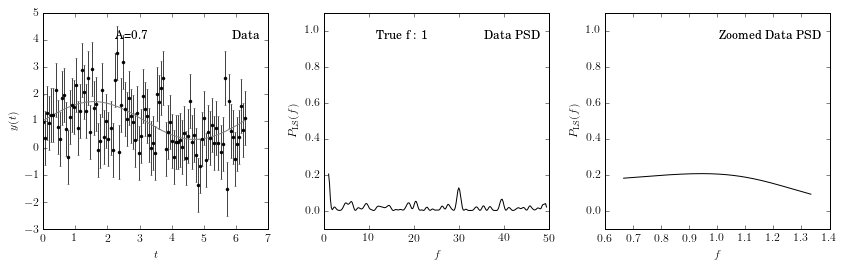

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


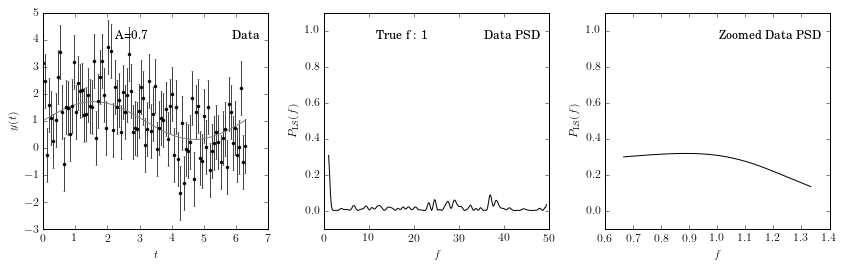

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


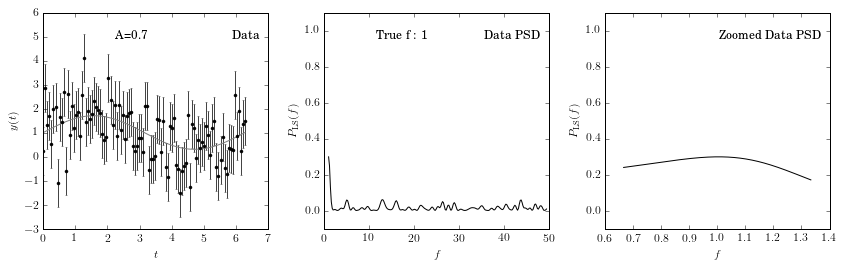

Using 242.50000000000003 bins
Best period: 5.230561861935338 days


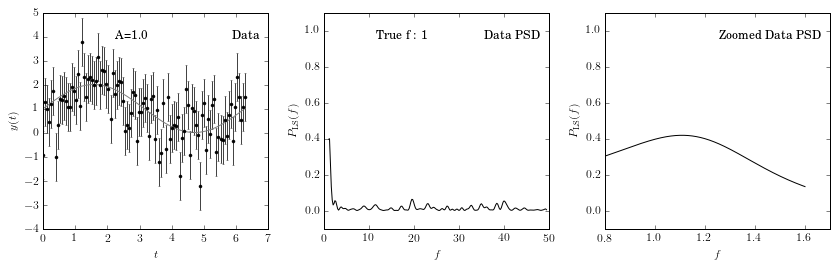

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


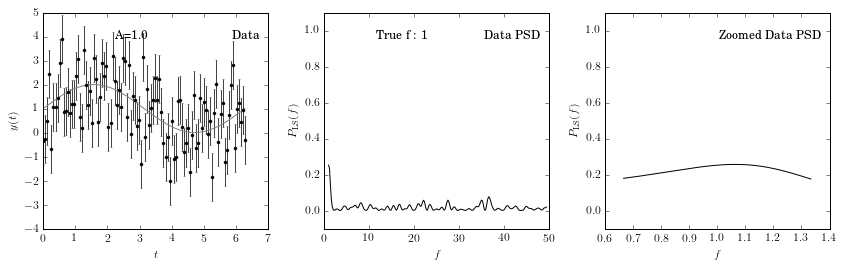

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


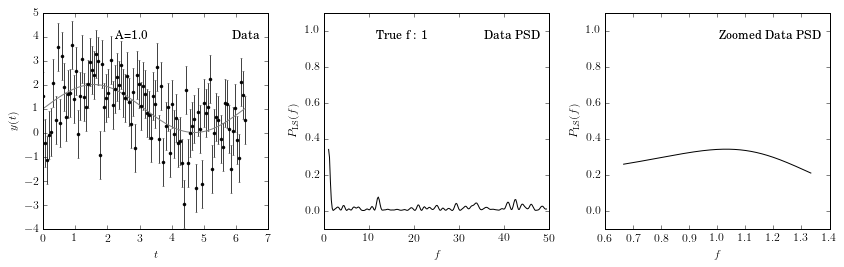

In [335]:
# Calculate 10.14 
from astroML.time_series import lomb_scargle
    
N_periods = 1
f_true = 1 
print('The input frequency is f_true = %d'%f_true)
omega_true = f_true * 2 * np.pi 
t_obs = np.linspace(0, N_periods*omega_true, 100)
#sigma_0 = 1.0
i = 0
for A in [0.01, 0.1, 0.7,1.0] : 
    for k in range(N_iterations):
        fname = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                        '_iteration_'+str(k).rjust(3,'0')+'.txt'
        data = np.genfromtxt(fname)
        xi = data[:,0]
        ei = data[:,1]
        #ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs)) 
        #y_obs1 = A* np.sin(t_obs) + 1 + ei
        y_obs1 = xi 
        # true underlying time series 
        t = np.linspace(0,  N_periods*omega_true, 10000)
        y = A* np.sin(t) + 1

        #------------------------------------------------------------
        # Compute the periodogram
        def frequency_grid(times):

            freq_min =  2* np.pi / abs(min(times) - max(times))
            delta_t  = np.zeros(len(times)-1) 
            for i in range(len(times)-1):
                delta_t[i] = (times[i+1]-times[i])
            freq_max = freq_max = np.pi /  np.median(delta_t)  # COMPLETE

            omega_min = 2*np.pi * freq_min

            n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
            print('Using {} bins'.format(n_bins))
            return np.linspace(freq_min, freq_max, n_bins)

        omega = frequency_grid(t_obs)

        P_obs1 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), omega)
        #P_true = lomb_scargle(t, y,  omega)

        def LS_peak_to_period(omegas, P_LS):
            """find the highest peak in the LS periodogram and return the corresponding period."""
            max_freq = omegas[np.argmax(P_LS)]
            return 2*np.pi/max_freq

        # provided alternate frequency function
        def alt_frequency_grid(Pmin, Pmax, n_bins = 5000):
            """Generate an angular frequency grid between Pmin and Pmax (assumed to be in days)"""
            freq_max = 2*np.pi / Pmin
            freq_min = 2*np.pi / Pmax
            return np.linspace(freq_min, freq_max, n_bins)

        best_period = LS_peak_to_period(omega, P_obs1)
        print("Best period: {} days".format(best_period))

        # Zoom in on the peak... , find new omegas and powers 
        zoomed_omega = alt_frequency_grid(Pmin=0.75*best_period, Pmax=1.5*best_period, n_bins = 5000) #
        P_obs2 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), zoomed_omega)

        #------------------------------------------------------------
        # Prepare the figures
        from astroML.plotting import setup_text_plots
        setup_text_plots(fontsize=12, usetex=True)

        fig, ax = plt.subplots(1,3,figsize=(13, 4))
        fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                            left=0.11, right=0.95)

        ax[0].plot(t, y, '-', c='gray')
        ax[0].errorbar(t_obs, y_obs1, sigma_0, fmt='.k', capsize=1, ecolor='#444444')
        ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
        ax[0].text(0.46, 0.92, "A="+str(A), ha='right', va='top', transform=ax[0].transAxes)
        #ax[0].set_ylim(-1.5, 1.8)
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$y(t)$')

        #
        #ax[1].fill(omega, P_true, fc='gray', ec='gray')
        ax[1].plot(omega, P_obs1, '-', c='black')

        ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
        ax[1].text(0.46, 0.92, "True f : "+str(f_true), ha='right', va='top', transform=ax[1].transAxes)
        ax[1].set_ylim(-0.1, 1.1)
        ax[1].set_xlabel('$f$')
        ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

        ax[2].plot(zoomed_omega, P_obs2, '-', c='black')
        ax[2].text(0.96, 0.92, "Zoomed Data PSD", ha='right', va='top', transform=ax[2].transAxes)
        ax[2].set_ylim(-0.1, 1.1)
        ax[2].set_xlabel('$f$')
        ax[2].set_ylabel(r'$P_{\rm LS}(f)$')

        plt.savefig('../data_products/aaa_Sine_'+str(i).rjust(2,'0')+'_PSD_sig_1.0_xi_ei_A_'+str(A)+'_iter_'+str(k).rjust(3,'0')+'N_periods_'+str(N_periods)+'.png')
        plt.show()
        i +=1

